# Business Context

**Index:**

 - 1.0 Problema de Negócio
 - 1.1 Importações de bibliotecas
 - 2.0 Coleta de Dados
 - 3.0 Descrição dos Dados
 - 4.0 Limpeza de dados
 - 5.0 Feature Engineering
 - 6.0 EDA
 - 7.0 Data Preparation
 - 8.0 Feature Selection
 - 9.0 Model Selection
 - 10.0 Tunning/Treinamento do modelo
 - 11.0 API
 
Estrátegia:

2.0 Coleta de Dados:

Coletar os dados utilizando pd.read_csv().

3.0 Descrição dos Dados:

- Descrever as seguintes infos por feature: percentual de missing, valores únicos, percentual de valores únicos, tipos de dados, skew, kurtosis.
- Descrever Gender vs Exited.
- Descrever Geography vs Exited.
- Descrever HasCrCard vs Exited 
- Descrever IsActiveMember vs Exited
- Descrever a variável 'type' com relação ao target.
- Descrever outras variáveis conforme for pertinente.
- Investigar a presença de Outliers.

4.0 Limpeza de dados:

- Investigar e eliminar os outliers


5.0 Feature Engineering

6.0 EDA

7.0 Data Preparation

8.0 Feature Selection

9.0 Model Selection

10.0 Tunning/Treinamento do modelo

11.0 API

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Helper Functions

In [2]:
def multi_boxplots(df, variables: list) -> None:

    """
    Function to check for outliers visually through a boxplot

    data: DataFrame

    variable: list of numerical variables
    """

    # set of initial plot posistion
    n = 1

    plt.figure(figsize=(18, 10))
    for column in df[variables].columns:
        plt.subplot(3, 3, n)
        _ = sns.boxplot(x=column, data=df)
        n += 1

    plt.subplots_adjust(hspace=0.3)

    plt.show()

# Data Colection

In [3]:
churn = pd.read_csv('data/churn.csv')
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Description

In [4]:
pd.DataFrame({'missing' :churn.isna().mean(),
              'uniques' :churn.nunique(),
              'dtypes'  :churn.dtypes,
              'min'     :churn.min(),
              'mean'    :churn.mean(),
              'median'  :churn.median(),
              'max'     :churn.max(),
              'skew'    :churn.skew(),
              'kurtosis':churn.kurtosis()})

,missing,uniques,dtypes,min,mean,median,max,skew,kurtosis
Age,0.0,70,int64,18,3.892180e+01,3.700000e+01,92,1.011320,1.395347
Balance,0.0,6382,float64,0,7.648589e+04,9.719854e+04,250898,-0.141109,-1.489412
CreditScore,0.0,460,int64,350,6.505288e+02,6.520000e+02,850,-0.071607,-0.425726
CustomerId,0.0,10000,int64,15565701,1.569094e+07,1.569074e+07,15815690,0.001149,-1.196113
EstimatedSalary,0.0,9999,float64,11.58,1.000902e+05,1.001939e+05,199992,0.002085,-1.181518
Exited,0.0,2,int64,0,2.037000e-01,0.000000e+00,1,1.471611,0.165671
Gender,0.0,2,object,Female,NaN,NaN,Male,NaN,NaN
Geography,0.0,3,object,France,NaN,NaN,Spain,NaN,NaN
HasCrCard,0.0,2,int64,0,7.055000e-01,1.000000e+00,1,-0.901812,-1.186973
IsActiveMember,0.0,2,int64,0,5.151000e-01,1.000000e+00,1,-0.060437,-1.996747


 - Temos dados de diferentes escalas
 - 'Customerid' e 'RowNumber' é um idientificador único podemos eliminar ou utiliza-lo como index do dataframe.
 - As variáveis 'HasCrCard' 'IsActiveMember' são categoricas ordinais iremos alterar o seu tipo para category.

## Descrever Gender vs Exited

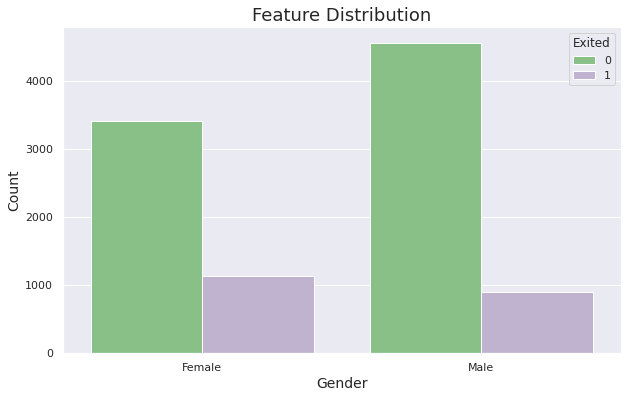

In [11]:
sns.set(style='darkgrid', palette='Accent')
ax = sns.countplot(x='Gender', hue='Exited', data=churn)
ax.figure.set_size_inches(10, 6)
ax.set_title('Feature Distribution', fontsize=18, loc='center')
ax.set_xlabel('Gender', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax=ax

 - Aparentemente não existe uma concentração do evento de 'Churn' conforme o genero.

## Descrever Geography vs Exited

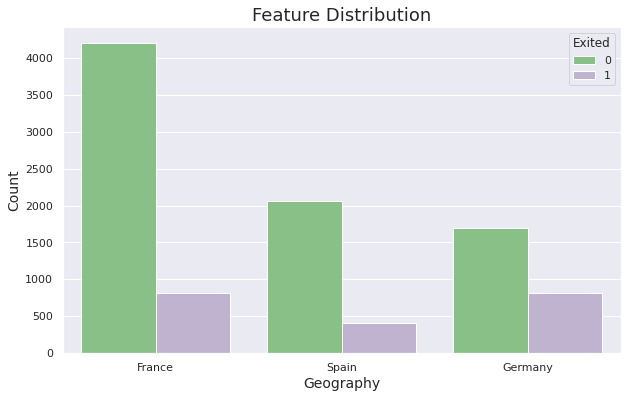

In [12]:
sns.set(style='darkgrid', palette='Accent')
ax = sns.countplot(x='Geography', hue='Exited', data=churn)
ax.figure.set_size_inches(10, 6)
ax.set_title('Feature Distribution', fontsize=18, loc='center')
ax.set_xlabel('Geography', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax=ax

In [20]:
# Percentual de observações por valores Geography
churn.groupby('Geography').count()['RowNumber'].apply(lambda x: (x/churn.shape[0])*100)

Geography
France     50.14
Germany    25.09
Spain      24.77
Name: RowNumber, dtype: float64

- Notamos que proporcionalmente parece ocorrer um maior churn de clientes da Alemanha. A mesma possui comente 25% das observações porém possui mais eventos churn que as demais categorias.

## Descrever HasCrCard vs Exited

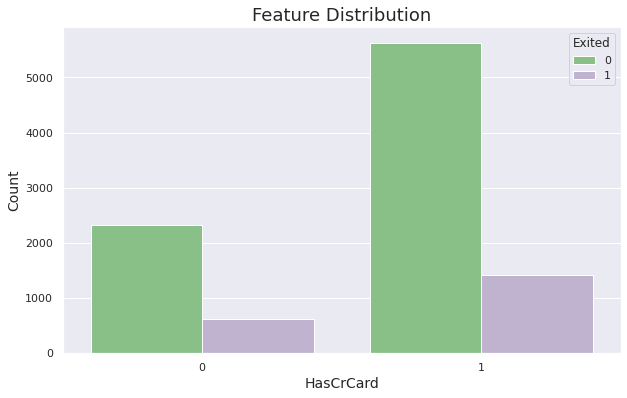

In [13]:
0sns.set(style='darkgrid', palette='Accent')
ax = sns.countplot(x='HasCrCard', hue='Exited', data=churn)
ax.figure.set_size_inches(10, 6)
ax.set_title('Feature Distribution', fontsize=18, loc='center')
ax.set_xlabel('HasCrCard', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax=ax

In [19]:
# Percentual de observações por valores HasCrCard
churn.groupby('HasCrCard').count()['RowNumber'].apply(lambda x: (x/churn.shape[0])*100)

HasCrCard
0    29.45
1    70.55
Name: RowNumber, dtype: float64

- Devido a maior concentração de obseravções com cartão de credito temos também maior numero de eventos de churn.

## Descrever IsActiveMember vs Exited

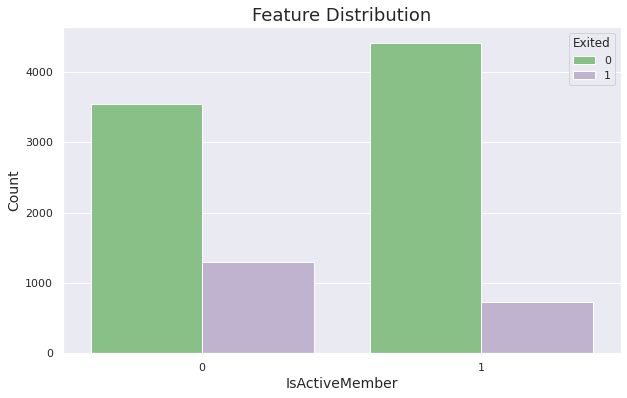

In [14]:
sns.set(style='darkgrid', palette='Accent')
ax = sns.countplot(x='IsActiveMember', hue='Exited', data=churn)
ax.figure.set_size_inches(10, 6)
ax.set_title('Feature Distribution', fontsize=18, loc='center')
ax.set_xlabel('IsActiveMember', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax=ax

In [21]:
# Percentual de observações por valores HasCrCard
churn.groupby('IsActiveMember').count()['RowNumber'].apply(lambda x: (x/churn.shape[0])*100)

IsActiveMember
0    48.49
1    51.51
Name: RowNumber, dtype: float64

 - Em um primeiro momento notamos que a inatividade leva a um maior churn. Os eventos estão distribuídos porém com maior quantidade de eventos de churn na categoria de inatividade.

## Alterando os tipos das variáveis 'HasCrCard', 'IsActiveMember', Exited

In [5]:
# Alterando o tipo de dados para category
colunas = ['HasCrCard','IsActiveMember', 'Exited', 'Surname', 'Geography','Gender']

for col in colunas:
    churn[col] = churn[col].astype('category')

In [6]:
# checkando os tipos
churn.dtypes

RowNumber             int64
CustomerId            int64
Surname            category
CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Exited             category
dtype: object

## Checkando a Presença de Outliers

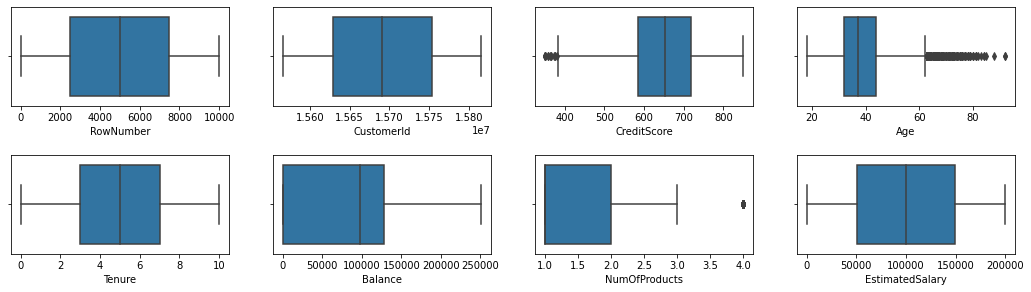

In [7]:
# Variáveis
variables = churn.select_dtypes(['int64', 'float64']).columns.to_list()

# Setando a posicão inicial
n = 1

plt.figure(figsize=(18, 10))
for column in churn[variables].columns:
    plt.subplot(4, 4, n)
    _ = sns.boxplot(x=column, data=churn)
    n += 1

plt.subplots_adjust(hspace=0.5)
plt.show()

 - Observamos Outliers nas variáveis 'CreditScore', 'Age','NumOfProducts'

### CreditScore

In [11]:
# Calculando o Q1 e Q3 e IQR
Q1 = np.quantile(churn['CreditScore'], .25)
Q3 = np.quantile(churn['CreditScore'], .75)
IQR = Q3 - Q1

# Calculando os limites low and high
low = Q1 - 1.5 * IQR
high = Q3 + 1.5 * IQR

# priting the limits
print(f'O limite inferior é {low}')
print(f'O limite superior é {high}')

O limite inferior é 383.0
O limite superior é 919.0


 - Filtrando somente o limite inferior, pois no boxplot observamos outliers somente no limite inferior.

### Age

In [13]:
# Calculando o Q1 e Q3 e IQR
Q1 = np.quantile(churn['Age'], .25)
Q3 = np.quantile(churn['Age'], .75)
IQR = Q3 - Q1

# Calculando os limites low and high
low = Q1 - 1.5 * IQR
high = Q3 + 1.5 * IQR

# priting the limits
print(f'O limite inferior é {low}')
print(f'O limite superior é {high}')

O limite inferior é 14.0
O limite superior é 62.0


 - Filtrando somente o limite superior, pois no boxplot observamos outliers somente no limite superior.

### NumOfProducts

Iremos filtrar todas as observações com 4 produtos, pois conforme o boxplot os outliers estão nesse patamar.

# Limpeza de Dados

 ## Cleaning Outliers.

In [19]:
# Filtrando 'CreditScore' somente o limite inferior.
churn = churn.loc[churn['CreditScore']>low, ]

# Filtrando 'Age' somente o limite inferior
churn = churn.loc[churn['Age']<59, ]

# Filtrando 'NumOfProducts'
churn = churn.loc[churn['NumOfProducts']<4, ]

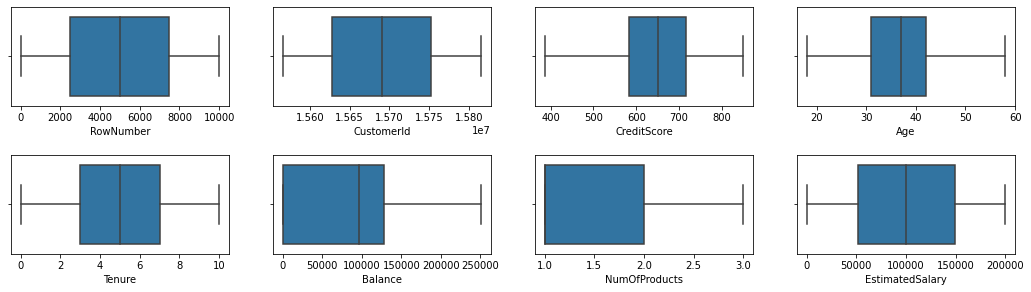

In [20]:
# checking the outliers again.
# Variáveis
variables = churn.select_dtypes(['int64', 'float64']).columns.to_list()

# Setando a posicão inicial
n = 1

plt.figure(figsize=(18, 10))
for column in churn[variables].columns:
    plt.subplot(4, 4, n)
    _ = sns.boxplot(x=column, data=churn)
    n += 1

plt.subplots_adjust(hspace=0.5)
plt.show()

# Feature Engineering

- some new variable here